In [11]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        "Probability of a data point given the current parameters"
        u = (datum - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        return y
    #printing model values
    def __repr__(self):
        return 'Gaussian({0:4.6}, {1:4.6})'.format(self.mu, self.sigma)

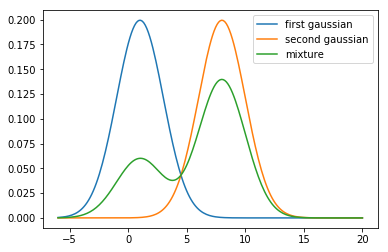

In [12]:
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#fit a single gaussian curve to the data
x = np.linspace(-6, 20, 200)
g_single = stats.norm(1, 2).pdf(x)
z_single = stats.norm(8, 2).pdf(x)

mixture_gaussian = 0.3 * g_single + 0.7 * z_single

plt.plot(x, g_single, label='first gaussian')
plt.plot(x, z_single, label="second gaussian")
plt.plot(x, mixture_gaussian, label="mixture")
plt.legend();

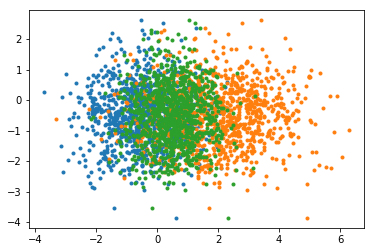

In [13]:
from numpy import random as rd

samples = rd.multivariate_normal([-0.5, -0.5], [[1, 0],[0, 1]], 1000)
samples2 = rd.multivariate_normal([2, 3], [[2, 0],[0, 2]], 1000)

mixture_sample = 0.6 * samples + 0.4 * samples2

plt.plot(samples[:, 0], samples[:, 1], '.')
plt.plot(samples2[:, 0], samples[:, 1], ".")

plt.plot(mixture_sample[:, 0], samples[:, 1], ".")

In [14]:
rd.multivariate_normal([2, 3], [[2, 0],[0, 2]], (1000,3))

array([[[-0.21627891,  2.81794398],
        [ 1.2586888 ,  2.02614738],
        [ 1.77223723,  3.48979796]],

       [[ 2.59583548,  4.43425882],
        [ 3.63329645,  5.06826744],
        [ 1.00336107,  2.3545007 ]],

       [[-0.25567298,  1.79312888],
        [ 3.79081144,  1.99588508],
        [ 2.94860663,  3.38889086]],

       ..., 
       [[ 3.02674119,  3.94926729],
        [ 4.64634349,  2.81881173],
        [ 0.93628454,  3.46491367]],

       [[ 0.64304147,  1.72091173],
        [ 1.68265251,  1.95611131],
        [ 1.49861717,  3.64417728]],

       [[ 1.49955696,  5.15937899],
        [ 0.63400387,  5.49412567],
        [ 3.20560304,  3.98605718]]])

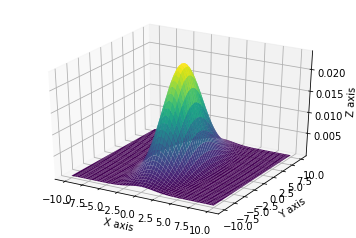

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [19]:
multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])


In [20]:
rv.pdf(pos)

array([[  4.89017315e-11,   5.58765952e-11,   6.38121064e-11, ...,
          6.38121064e-11,   5.58765952e-11,   4.89017315e-11],
       [  5.02233152e-11,   5.73866766e-11,   6.55366473e-11, ...,
          6.55366473e-11,   5.73866766e-11,   5.02233152e-11],
       [  5.15750913e-11,   5.89312569e-11,   6.73005865e-11, ...,
          6.73005865e-11,   5.89312569e-11,   5.15750913e-11],
       ..., 
       [  5.15750913e-11,   5.89312569e-11,   6.73005865e-11, ...,
          6.73005865e-11,   5.89312569e-11,   5.15750913e-11],
       [  5.02233152e-11,   5.73866766e-11,   6.55366473e-11, ...,
          6.55366473e-11,   5.73866766e-11,   5.02233152e-11],
       [  4.89017315e-11,   5.58765952e-11,   6.38121064e-11, ...,
          6.38121064e-11,   5.58765952e-11,   4.89017315e-11]])